In [18]:
#/Users/sanilveeravu/Documents/DataVisualizationCourse/gitlab/projectrepo/capstone_climate_project/data/cleaned_data/test/mntmaxdata.csv

In [35]:
import pandas as pd
df=pd.read_csv('../data/cleaned_data/tmaxdata.csv',names=["state_code", "date", "value"],index_col='date',parse_dates=True)
print('Shape of data',df.shape)
df = df[df['state_code']=='MN']
df

Shape of data (2088316, 3)


,state_code,metric,value
date,,,
1905-01-01,MN,TMAX,10.0
1905-01-02,MN,TMAX,10.0
1905-01-03,MN,TMAX,7.2
1905-01-04,MN,TMAX,5.0
1905-01-05,MN,TMAX,1.1
...,...,...,...
2018-12-27,MN,TMAX,4.4
2018-12-28,MN,TMAX,7.8
2018-12-29,MN,TMAX,7.2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41638 entries, 1905-01-01 to 2018-12-31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state_code  41638 non-null  object 
 1   metric      41638 non-null  object 
 2   value       41638 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


<AxesSubplot:xlabel='date'>

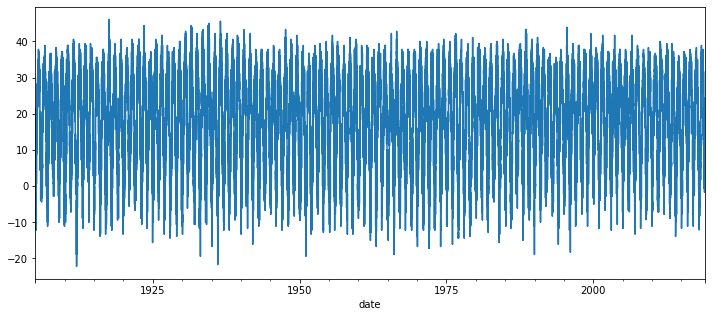

In [37]:
df['value'].plot(figsize=(12,5))

In [40]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [41]:
adf_test(df['value'])

1. ADF :  -20.209002111099164
2. P-Value :  0.0
3. Num Of Lags :  55
4. Num Of Observations Used For ADF Regression: 41582
5. Critical Values :
	 1% :  -3.4305072724671786
	 5% :  -2.861609510890435
	 10% :  -2.5668069984020314


In [42]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['value'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=216745.426, Time=16.71 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=330308.893, Time=0.47 sec


/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=219234.133, Time=1.00 sec


/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=286179.724, Time=3.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=377579.809, Time=0.31 sec


/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=218254.885, Time=6.60 sec


/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=219037.227, Time=10.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=216703.787, Time=24.60 sec


/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=216701.810, Time=18.68 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=218397.042, Time=1.80 sec


/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=216703.789, Time=24.86 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=219196.265, Time=1.40 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=217912.442, Time=2.66 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=216705.591, Time=18.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=216794.489, Time=11.86 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 143.247 seconds


/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [43]:
print(df.shape)
train=df.iloc[:-350]
test=df.iloc[-350:]
print(train.shape,test.shape)

(41638, 3)
(41288, 3) (350, 3)


In [44]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['value'],order=(10,0,1))
model=model.fit()
model.summary()

/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                41288
Model:                ARIMA(10, 0, 1)   Log Likelihood             -107447.222
Date:                Sat, 13 Aug 2022   AIC                         214920.444
Time:                        14:56:04   BIC                         215032.612
Sample:                    01-01-1905   HQIC                        214955.896
                         - 01-15-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4679      1.081     17.084      0.000      16.349      20.587
ar.L1          1.7350      0.024     73.537      0.000       1.689       1.781
ar.L2         -0.9039      0.024    -38.139      0.000      -0.950      -0.857
ar.L3          0.1548      0.011     14.513      0.000       0.134       0.176
ar.L4          0.0108      0.010      1.084      0.279      -0.009       0.030
ar.L5         -0.0207      0.010     -2.099      0.036      -0.040      -0.001
ar.L6          0.0039      0.010      0.398      0.691      -0.015       0.023
ar.L7          0.0105      0.010      1.046      0.295      -0.009       0.030
ar.L8          0.0076      0.010      0.741      0.459      -0.012       0.028
ar.L9         -0.0120      0.010     -1.266      0.206      -0.031       0.007
ar.L10         0.0108      0.006      1.911      0.056      -0.000       0.022
ma.L1         -0.7862      0.023    -33.834      0.000      -0.832      -0.741
sigma2        10.6633      0.054    197.845      0.000      10.558      10.769
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7577.82
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

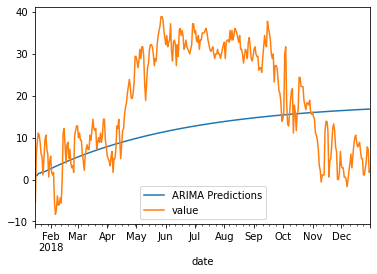

In [45]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['value'].plot(legend=True)

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['value'].mean()
rmse=sqrt(mean_squared_error(pred,test['value']))
print(rmse)

16.95578798988516
